In [11]:
using PyPlot
using DelimitedFiles

In [12]:
# Open the file
file = open("log_grid.dat", "r")
# Read lines from the file and store the numbers in an array
rs = Float64[]

for line in eachline(file)
    push!(rs, parse(Float64, line))
end

# Close the file
close(file);


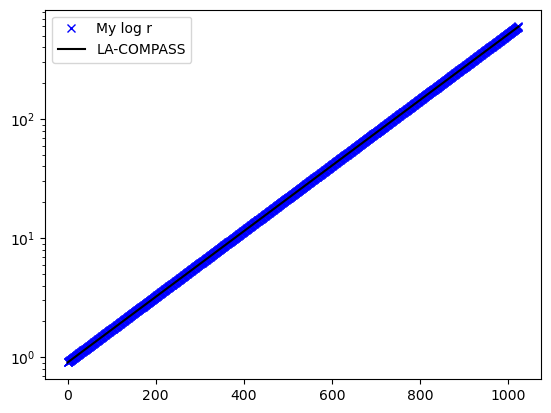

Any[]

In [13]:
function logr(x::Int, x1min::T, x1max::T, nx1::Int) where T
    dr = log10(x1max/x1min)/nx1
    return 10^(log10(x1min) + x*dr)
end

nx1 = 1024
xs  = collect(1:1:nx1)
x1min = 0.9 		# minimum value of X1, 0.9
x1max = 600.		# maximum value of X1

my_rs = logr.(xs,x1min,x1max,nx1);

plot(my_rs,"bx",label="My log r")
plot(rs,"k",label="LA-COMPASS")
legend()
semilogy()

# Actual Code Data

In [14]:
#=
  col #1: radius
  col #2: torque information for the first planet
  col #3: azimuthal-averaged density (gas)
  col #4: indirect torque from star (w planet) or dust Stokes #(w dust)
  col #5: potential vorticity
  col #6: Mdot (mstar/per-year,  x2*pi for sum over phi-dir)
  col #7: Reynolds stress
  col #8: viscous stress, (alpha)
  col #9: dust density
  col #10: mdot for dust for single species
  col #11 to col #10+nDust-1: dust density for each species
  if (nDust > 1) then
    col #9+nDust: total density of dust
    col #9+nDust+1: total density for size above mm-size
    col #9+nDust+2: total density for size above 0.1mm-size
    col #9+nDust+3: total density for size above 0.01mm-size
    col #9+nDust+4: density-averaged size
    col #9+nDust+5: max Dust-size of this ring <- maximum (size)
  else
    col #10 dust vr
    col #11 dust vphi
    col #12 dust size of representative (coagulation_one)
  endif
=#
data = readdlm("torq1d_nDust141.dat");

In [15]:
size(data)

(11275, 155)

In [16]:
plot(r,data[t_ind,14])
xlabel("r",size=15)
ylabel("dust size",size=15)
loglog()

LoadError: UndefVarError: `r` not defined

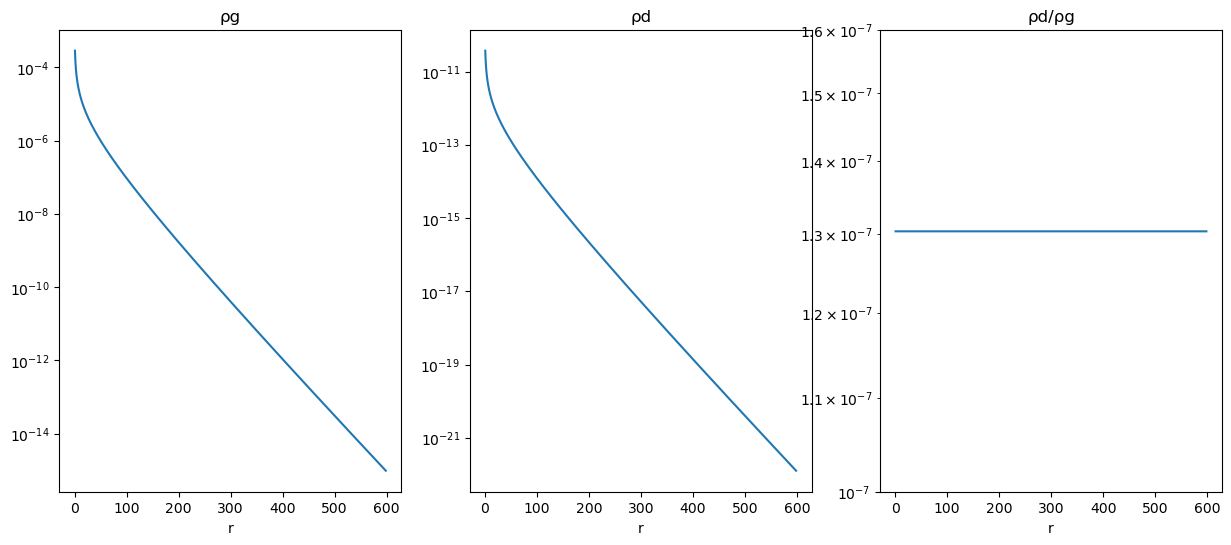

(1.0e-7, 1.6e-7)

In [17]:
t_i = 1
d_i = 1

get_time_ind(i::Int) = 1025*(i-1) + 2 :  1025*(i);
dust_i = 9 + d_i + 1
t_ind = get_time_ind(t_i);

r   = data[t_ind,1];
ρg  = data[t_ind,3];
ρd  = data[t_ind,9];

figure(figsize=(15,6))
subplot(131);
plot(r,ρg)
semilogy()
xlabel("r")
title("ρg");
subplot(132);
plot(r,ρd)
semilogy()
xlabel("r")
title("ρd");
subplot(133);
plot(r,ρd./ρg)
semilogy()
xlabel("r")
title("ρd/ρg");
ylim(1e-7,1.6e-7)

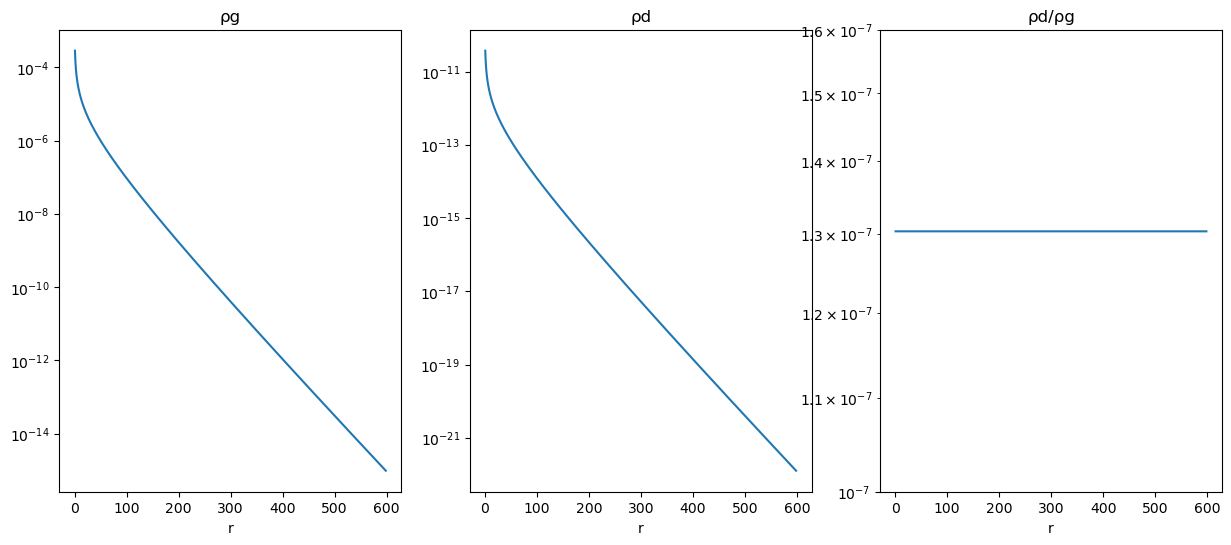

(1.0e-7, 1.6e-7)

In [18]:
t_i = 1
d_i = 1

dust_i = 9 + d_i + 1
t_ind = get_time_ind(t_i);

r   = data[t_ind,1];
ρg  = data[t_ind,3];
ρd  = data[t_ind,9];

figure(figsize=(15,6))
subplot(131);
plot(r,ρg)
semilogy()
xlabel("r")
title("ρg");
subplot(132);
plot(r,ρd)
semilogy()
xlabel("r")
title("ρd");
subplot(133);
plot(r,ρd./ρg)
semilogy()
xlabel("r")
title("ρd/ρg");
ylim(1e-7,1.6e-7)

In [19]:
data2 = readdlm("torq1d_nDust20.dat");
size(data2)
# ndust 141 -> 155
# ndust 20  -> 34

(2049, 34)

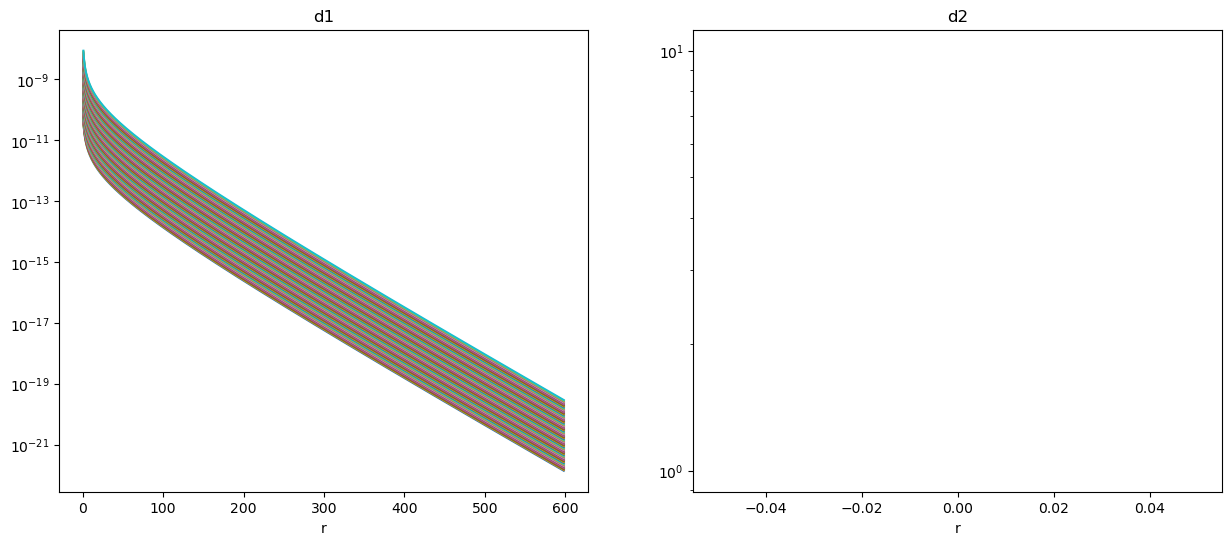

In [22]:
t_i = 1
d_i = 1

t_ind = get_time_ind(t_i);

d1  = data[t_ind,11];
d2  = data[t_ind,12];
d3  = data[t_ind,13];

figure(figsize=(15,6))
subplot(121);
for d_i = 11:100
  plot(r, data[t_ind,d_i]);
end
semilogy()
xlabel("r")
title("d1");

subplot(122);

semilogy()
xlabel("r");
title("d2");

In [23]:
d1   = data[t_ind,11];
d141 = data[t_ind,10+141-1];

In [24]:
m141 = d141[1]/200^3
m1   =   d1[1]/(1e-5)^3

41886.69999999999

In [25]:
d1[1], d141[1]

(4.18867e-11, 2.85023e-6)

In [26]:
d2_1  = data2[t_ind,11];
d2_20 = data2[t_ind,10+20-1];

In [27]:
d2_1[1],d2_20[1]

(7.29085e-10, 2.8549e-6)

In [28]:
data2[t_ind,9+20][1],data[t_ind,9+141][1]

(2.8549e-6, 2.85023e-6)

In [29]:
# dust total density, gas density, dust density
data[t_ind,9+141][1],data[t_ind,3][1],data[t_ind,9][1]

(2.85023e-6, 0.000285023, 3.71472e-11)

In [30]:
data[t_ind,9+141][100]/data[t_ind,3][100]

0.01

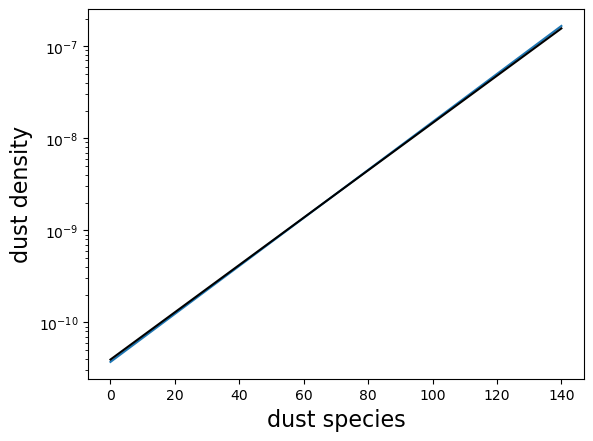

PyObject Text(0.5, 33.0, 'dust species')

In [31]:
#11 to col #10+nDust-1: dust density for each species
data_t0 = data[t_ind,:];
i = collect(1:1:141)
dust_dens_distirbution_1 = data_t0[1,9:9+141-1];    # it sems 9:10+141-2
plot(dust_dens_distirbution_1)
plot(exp.(i/16.9)*dust_dens_distirbution_1[1],"k")
semilogy()
ylabel("dust density",size=16)
xlabel("dust species",size=16)

In [32]:
dust_dens_distirbution_1[end],dust_dens_distirbution_1[1]

(1.66127e-7, 3.71472e-11)

In [33]:
#=
  col #1: radius
  col #2: torque information for the first planet
  col #3: azimuthal-averaged density (gas)
  col #4: indirect torque from star (w planet) or dust Stokes #(w dust)
  col #5: potential vorticity
  col #6: Mdot (mstar/per-year,  x2*pi for sum over phi-dir)
  col #7: Reynolds stress
  col #8: viscous stress, (alpha)
  col #9: dust density
  col #10: mdot for dust for single species
  col #11 to col #10+nDust-1: dust density for each species
  if (nDust > 1) then
    col #9+nDust: total density of dust
    col #9+nDust+1: total density for size above mm-size -> is that make sense?
    col #9+nDust+2: total density for size above 0.1mm-size -> not making sense!
    col #9+nDust+3: total density for size above 0.01mm-size -> also!
    col #9+nDust+4: density-averaged size
    col #9+nDust+5: max Dust-size of this ring <- maximum (size)
=#
data_t0[1,end-2],data_t0[1,end-3],data_t0[1,end-4]
# it seems that they are equally distributed along mm, 0.1, 0.0mm

(2.84459e-6, 2.8313e-6, 2.78971e-6)

In [35]:
# comment : \sum dust_dens = 0.01*gas_dens
sum(data_t0[1,9:149])/(data_t0[1,3]*0.01)

0.9999991995733678

In [37]:
# dust total density, gas density, dust density
data[t_ind,9+141][1],data[t_ind,3][1],data[t_ind,6][1]

(2.85023e-6, 0.000285023, -1.38314e-9)

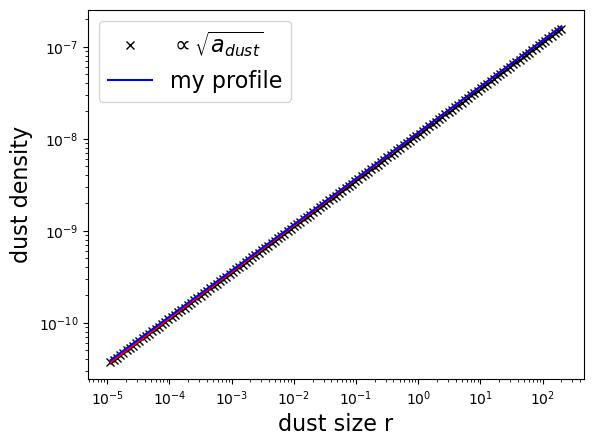

PyObject Text(33.00000000000001, 0.5, 'dust density')

In [79]:
dust_size_max = 200.0
dust_size_min = 1e-5
d_size = log10(dust_size_max/dust_size_min)/141;
dust_size_distirbution_1 = logr.(collect(1:1:141),dust_size_min,dust_size_max,141);
d_myprofile = GetDustProfile(data_t0[1,3],dust_size_distirbution_1);

plot(dust_size_distirbution_1, sqrt.(dust_size_distirbution_1/dust_size_distirbution_1[1])*dust_dens_distirbution_1[1]
     ,"kx",label=L" \propto\sqrt{a_{dust}}")
plot(dust_size_distirbution_1, dust_dens_distirbution_1,"r")
plot(dust_size_distirbution_1, d_myprofile,"b", label="my profile")
loglog()
legend(fontsize=16)
xlabel("dust size r",size=16)
ylabel("dust density",size=16)

# For Dust 2 File

In [74]:
d_size = log10(dust_size_max/dust_size_min)/141;
function GetDustProfile(d::T, dsize::Array{T,1}; D2GRatio=0.01) where T
    # \sum dust_i =\sum_{rmin -> rmax} sqrt(r_i/r_min) *D0 = 0.01 Gas
    TotalDustDesnity = D2GRatio*d
    sum_ri_rmin = 0.0
    for i = 1:size(dsize,1)
        sum_ri_rmin += sqrt(dsize[i]/dsize[1])
    end
    D0 = TotalDustDesnity/sum_ri_rmin
    return D0*sqrt.(dsize/dsize[1]);
end

GetDustProfile (generic function with 1 method)

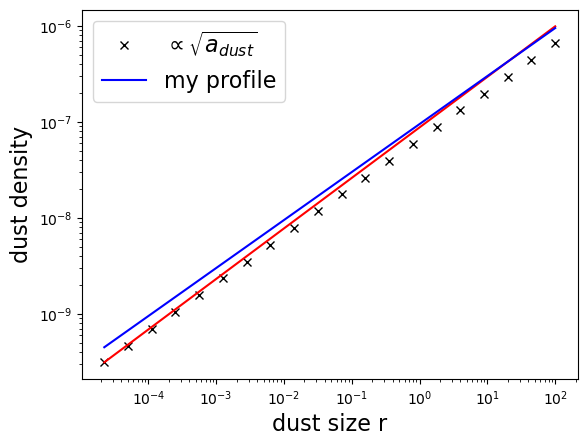

1.0000009856737537

In [81]:
dust_size_max = 100.0
dust_size_min = 1e-5
nDust = 20
d_size = log10(dust_size_max/dust_size_min)/nDust;
dust_size_distirbution_2 = logr.(collect(1:1:nDust),dust_size_min,dust_size_max,nDust);

data2_t0 = data2[t_ind,:];
dust_dens_distirbution_2 = data2_t0[1,9:9+nDust-1];    # it sems 9:10+141-2
d_myprofile = GetDustProfile(data2_t0[1,3],dust_size_distirbution_2);

plot(dust_size_distirbution_2, sqrt.(dust_size_distirbution_2/dust_size_distirbution_2[1])*dust_dens_distirbution_2[1]
     ,"kx",label=L" \propto\sqrt{a_{dust}}")
plot(dust_size_distirbution_2, dust_dens_distirbution_2,"r")
plot(dust_size_distirbution_2, d_myprofile,"b", label="my profile")

loglog()
legend(fontsize=16)
xlabel("dust size r",size=16)
ylabel("dust density",size=16)

sum(dust_dens_distirbution_2)/(0.01*data2_t0[1,3])

# Velocity and Density Profile

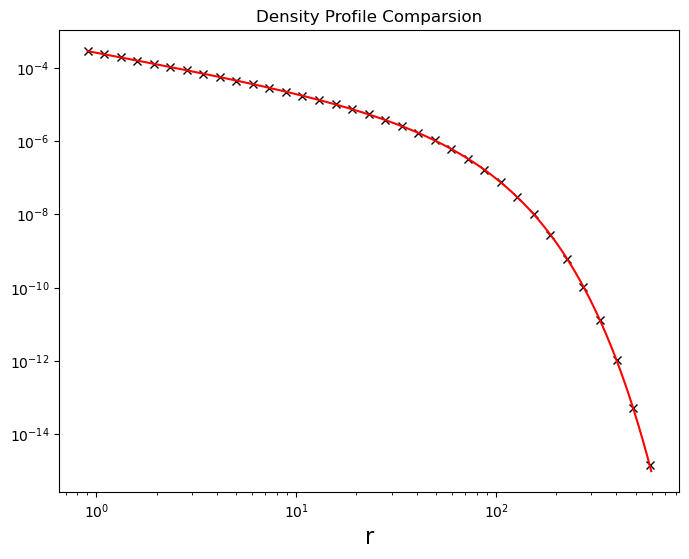

In [73]:
zeta = 1.0
beta = 1.0
rc   = 30.0
Nx   = 1024
N0   = 8.84e-6

function VelocityProfile()
    return
end

function DensityProfile(M0::Float64,rc::Float64,beta::Float64,r::T) where {T <: Real}
    return @. M0*(r/rc)^(-beta)*exp(-(r/rc)^(2-beta));
end

dd = DensityProfile.(N0,rc,beta,r);

t_i = 1
dust_i = 9 + d_i + 1
t_ind = get_time_ind(t_i);
ρg  = data[t_ind,3];

figure(figsize=(8,6))
plot(r[1:30:end],dd[1:30:end],"kx")
plot(r,ρg,"r")
loglog()
xlabel("r",size=16)
title("Density Profile Comparsion");
#ylim(1e-13,1e-3)

# Unit

In [19]:
AU = 1.496e13
Ms = 1.989e33
l  = AU
m  = Ms
G0 = 6.67e-8 # cm^3/g/s^2

G = G0*m/l^3 # AU^3/Ms/s^2
t = sqrt(1/G)/3600/24/365 # s -> yr/2\pi

0.15929805560858118